<a href="https://colab.research.google.com/github/mayukbasu/Federal-Reserve-data-on-interest-rates-and-money-stocks/blob/main/Project_on_Federal_Reserve_data_on_interest_rates_and_money_stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! rm -rf  PyFed
! git clone https://github.com/yj1990/PyFed

Cloning into 'PyFed'...
remote: Enumerating objects: 149, done.
remote: Counting objects: 100% (149/149), done.
remote: Compressing objects: 100% (106/106), done.
remote: Total 149 (delta 84), reused 87 (delta 37), pack-reused 0
Receiving objects: 100% (149/149), 2.49 MiB | 10.02 MiB/s, done.
Resolving deltas: 100% (84/84), done.


In [ ]:
! pip install quandl fredapi

In [ ]:
import os
ROOT_DIR = "."
try:
    os.chdir(os.path.join(ROOT_DIR,'PyFed'))
except:
    pass

import PyFed.interest_rate as ir
import PyFed.money_stock as ms
import plotly.express as px
import plotly.graph_objects as go

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def ts_plot(df,date_range,keys,names,title):

    fig = go.Figure()
    
    for k,n in zip(keys,names):
        
        fig.add_trace(
            go.Scatter(
                x=df.index, 
                y=df[k], 
                name=n
            )
        )

    fig.update_layout(
        title_text=title,
        xaxis_rangeslider_visible=True
    )
    
    fig.show()

In [ ]:
get_ir = ir.vendor()

In [ ]:
fed_repo_rate,fed_repo_vol = get_ir.fed_repo('both')

In [ ]:
# Plot volume of repo operations
df = fed_repo_vol['RP']
ts_plot(df, df.index, df.columns, df.columns, 'Volume for Repo operations')

In [ ]:
# Plot volumes of RRP operations
df = fed_repo_vol['RRP']
ts_plot(df, df.index, df.columns, df.columns, 'Volume for RRP operations')

In [ ]:
# load gcf repo rates
gcf = get_ir.dtcc_gcf()

In [ ]:
df = gcf.copy()
ts_plot(df, df.index, df.columns, df.columns, 'GCF Repo Index')

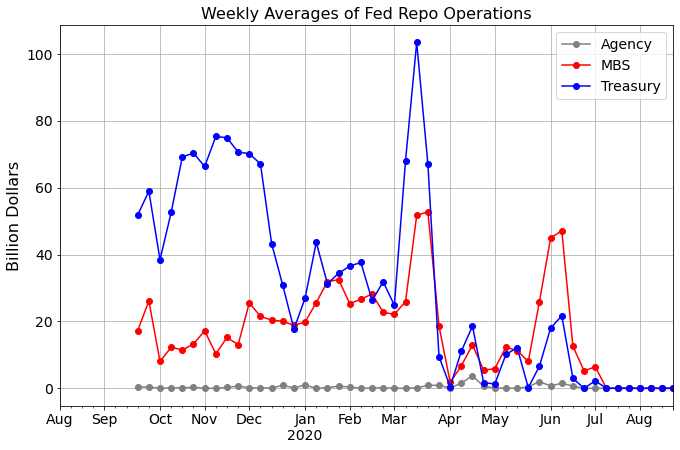

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

ax = fed_repo_vol['RP']['2019-8':].resample('W').mean().plot(marker='o',color = ['Gray','Red','Blue'],grid = True, figsize = (11,7))
ax.legend(['Agency','MBS','Treasury'])
ax.set_title('Weekly Averages of Fed Repo Operations', fontsize=16)
ax.set_ylabel('Billion Dollars',fontsize=16)
ax.set_xlabel(None)
plt.savefig('fedrepo.png')

In [ ]:
import os
ROOT_DIR = "."
try:
    os.chdir(os.path.join(ROOT_DIR,'PyFed'))
except:
    pass

import PyFed.interest_rate as ir
import PyFed.money_stock as ms
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
H8 = ms.FRB_H8.H8()

In [ ]:
df = H8.book

In [ ]:
H8.info()

All Commercial Banks, NSA
B1001NCBD: Bank credit
B1002NCBD: 	Securities in bank credit
B1003NCBD: 		Treasury and agency securities
B1301NCBD: 			Agency MBS
B1302NCBD: 			Treasuries
B1011NCBD: 		Other securities
B1303NCBD: 			Non-Agency MBS
B1304NCBD: 			Securities other than MBS or Treasuries
B1020NCBD: 	Loans and leases in bank credit
B1023NCBD: 		Commercial and industrial loans
B1026NCBD: 		Real estate loans
B1221NCBD: 			Residential real estate loans
B1027NCBD: 				Revolving home equity loans
B1220NCBD: 				Closed-end residential loans
B3219NCBD: 			Commercial real estate loans
B1215NCBD: 				Construction and land development loans
B1216NCBD: 				Secured by farmland
B1217NCBD: 				Secured by multifamily properties
B1218NCBD: 				Secured by nonfarm nonresidential properties
B1029NCBD: 		Consumer loans
B1247NCBD: 			Credit cards and other revolving plans
B3248NCBD: 			Other consumer loans
B1243NCBD: 				Automobile loans
B1245NCBD: 				All other consumer loans
B3305NCBD: 		All other lo

In [ ]:


def two_column_line_plot(df, col1, col2, start_date_1='2008', start_date_2='2008', sharey = False):
  df.index.names
  
  fig, axes = plt.subplots(1,2, figsize=(12,5), sharey = sharey)
  df[col1].unstack()[start_date_1:].apply(lambda x: x/1000).plot(color = ['r','b','gray'], ax=axes[0])
  df[col2].unstack()[start_date_2:].apply(lambda x: x/1000).plot(color = ['r','b','gray'], ax=axes[1])

  axes[0].set_ylabel('Billion Dollars')
  axes[0].set_title(col1)
  axes[1].set_ylabel('Billion Dollars')
  axes[1].set_title(col2)

  for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))

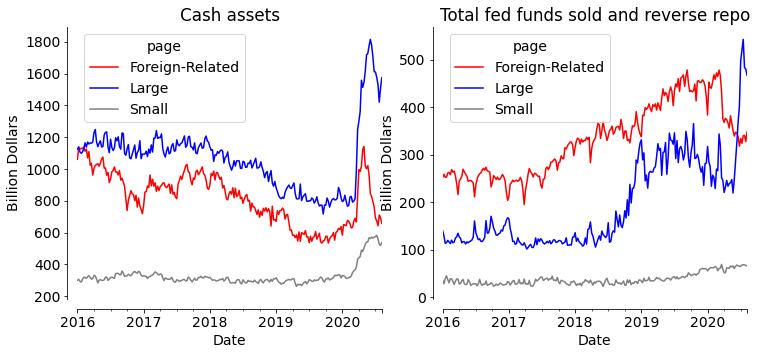

In [ ]:
two_column_line_plot(df,'Cash assets', 'Total fed funds sold and reverse repo', start_date_1 = '2016', start_date_2 = '2016')

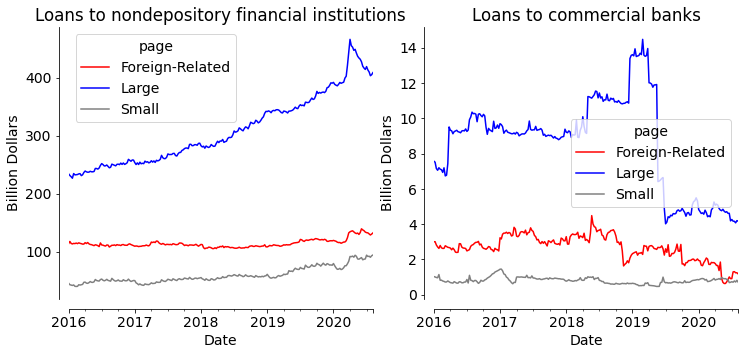

In [ ]:
two_column_line_plot(df,'Loans to nondepository financial institutions', 'Loans to commercial banks', 
                     start_date_1 = '2016', start_date_2 = '2016')

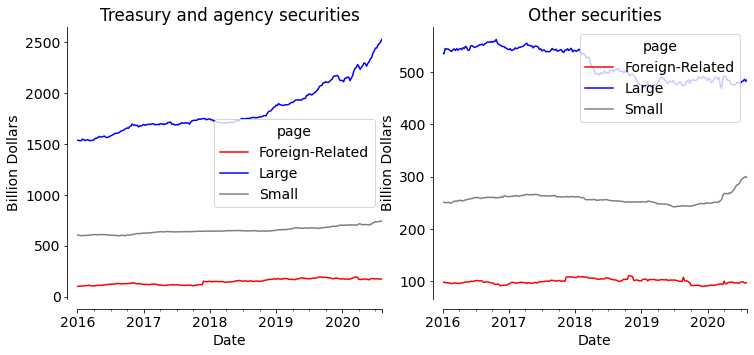

In [ ]:
two_column_line_plot(df,'Treasury and agency securities', 'Other securities', start_date_1 = '2016', start_date_2 = '2016')

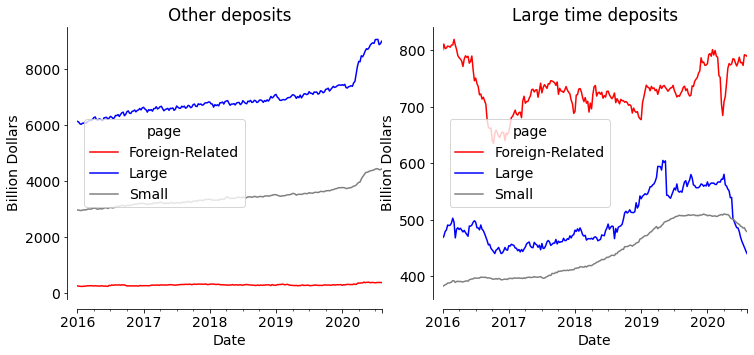

In [ ]:
two_column_line_plot(df,'Other deposits', 'Large time deposits', start_date_1 = '2016', start_date_2 = '2016')

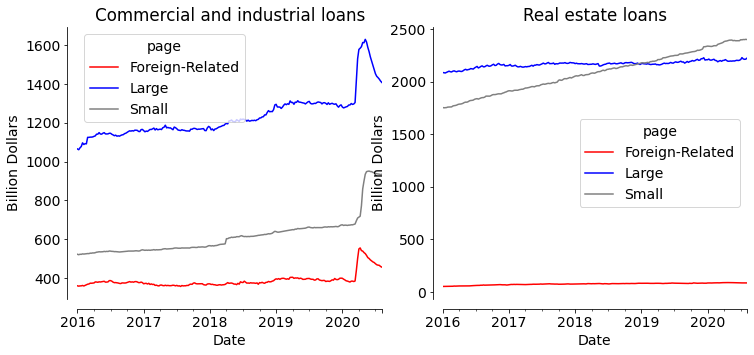

In [ ]:
two_column_line_plot(df,'Commercial and industrial loans', 'Real estate loans', start_date_1 = '2016', start_date_2 = '2016')

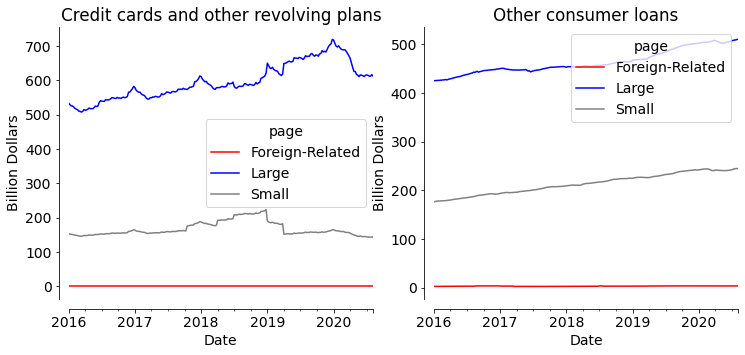

In [ ]:
two_column_line_plot(df,'Credit cards and other revolving plans', 'Other consumer loans', start_date_1 = '2016', start_date_2 = '2016')